# 04. PyTorch Custom Datasets Exercises Template

Welcome to the 04. PyTorch Custom Datasets exercise template.

The best way to practice PyTorch code is to write more PyTorch code.

So read the original notebook and try to complete the exercises by writing code where it's required.

Feel free to reference the original resources whenever you need but should practice writing all of the code yourself.

## Resources

1. These exercises/solutions are based on [notebook 04 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/04_pytorch_custom_datasets/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/vsFMF9wqWx0).
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [145]:
# Import torch
import torch
from torch import nn

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# Setup device agnostic code
device = "mps" if torch.mps.is_available() else "cpu"
device

2.7.0


'mps'

## 1. Our models are underperforming (not fitting the data well). What are 3 methods for preventing underfitting? Write them down and explain each with a sentence.

1. **Increase model complexity**: Use a deeper neural network or more parameters to give the model more capacity to learn complex patterns in the data.
2. **Train for more epochs**: Let the model train longer so it has more chances to capture the underlying structure of the data
3. **Reduce regularization strength**: If regularization is to strong, it can overly constrain the model,lowering L1/L2 regularization can help the model fit the data better.

## 2. Recreate the data loading functions we built in [sections 1, 2, 3 and 4 of notebook 04](https://www.learnpytorch.io/04_pytorch_custom_datasets/). You should have train and test `DataLoader`'s ready to use.

In [ ]:
# 1. Get data
import requests
import zipfile
from pathlib import Path

data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

    with open(data_path /"pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print("Downloading pizza, steak, sushi data ...")
        f.write(request.content)
    
    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Unzipping pizza, steak, sushi data...")
        zip_ref.extractall(image_path)

In [ ]:
# 2. Become one with the data
import os
def walk_through_dir(dir_path):
  """Walks through dir_path returning file counts of its contents."""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [ ]:
walk_through_dir(image_path)

In [ ]:
# Setup train and testing paths
train_dir = image_path / "train"
test_dir = image_path / "test"
train_dir, test_dir

In [ ]:
# Visualize an image
import random
from PIL import Image

random.seed(42)

image_path_list = list(image_path.glob("*/*/*.jpg"))
print(type(image_path_list))
random_image_path = random.choice(image_path_list)

image_class = random_image_path.parent.stem
img = Image.open(random_image_path)
print(random_image_path)
print(image_class)
print(img.height)
print(img.width)

In [ ]:
# Do the image visualization with matplotlib
import  matplotlib.pyplot as plt
import numpy as np

img_as_array = np.array(img)
plt.figure(figsize=(10,7))
plt.imshow(img_as_array)
plt.title(f"image_class:{image_class} | image shape {img_as_array.shape}")
plt.axis(False)

We've got some images in our folders.

Now we need to make them compatible with PyTorch by:
1. Transform the data into tensors.
2. Turn the tensor data into a `torch.utils.data.Dataset` and later a `torch.utils.data.DataLoader`.

In [ ]:
# 3.1 Transforming data with torchvision.transforms
from torchvision import transforms
data_trainsform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

In [ ]:
# Write transform for turning images into tensors
from PIL import Image
with Image.open(random_image_path) as f:
    fig, ax = plt.subplots(1,2)
    ax[0].imshow(f)
    ax[0].set_title(f"original size : \n {f.size}")
    ax[0].axis(False)

    transformed_image = data_trainsform(f).permute(1, 2, 0)
    ax[1].imshow(transformed_image)
    ax[1].set_title(f"transformed_image size : \n {transformed_image.shape}")
    ax[1].axis(False)

In [ ]:
# Write a function to plot transformed images
def plot_transformed_images(image_paths, transform, n=3, seed= 42):
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1,2)
            ax[0].imshow(f)
            ax[0].set_title(f"original size : \n {f.size}")
            ax[0].axis(False)

            transformed_image = transform(f).permute(1, 2, 0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"transformed_image size : \n {transformed_image.shape}")
            ax[1].axis(False)

            fig.suptitle(f"Class:{image_path.parent.stem}")

plot_transformed_images(image_path_list, data_trainsform, 3)

### Load image data using `ImageFolder`

In [ ]:
# Use ImageFolder to create dataset(s)
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_trainsform,
                                  target_transform=None)
test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_trainsform)

train_data, test_data

In [ ]:
# Get class names as a list
class_names = train_data.classes
class_names

In [ ]:
# Can also get class names as a dict
class_dict = train_data.class_to_idx
class_dict

In [ ]:
# Check the lengths of each dataset
len(train_data), len(test_data)

In [ ]:
# Turn train and test Datasets into DataLoaders
from torch.utils.data import DataLoader
train_dataloader = DataLoader(dataset=train_data,
                            batch_size=32,
                            shuffle=True,
                            num_workers=0)
test_dataloader = DataLoader(dataset=train_data,
                            batch_size=32,
                            shuffle=False,
                            num_workers=0)

In [ ]:
# How many batches of images are in our data loaders?
train_dataloader.batch_size

img, label =next(iter(train_dataloader))
print(img.shape)
print(label)

## 3. Recreate `model_0` we built in section 7 of notebook 04.

In [146]:
class TinyVGG(nn.Module):
    def __init__(self, input_shape, hidden_units, output_shape):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=2,
                      stride=1,
                      padding=0),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=2,
                      stride=1,
                      padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=1)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=2,
                      stride=1,
                      padding=0),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=2,
                      stride=1,
                      padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=1)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*58*58,
                      out_features=output_shape)
        )
    def forward(self, x):
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        # print(x.shape)
        return self.classifier(x)
torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3,
                  hidden_units=20,
                  output_shape=len(class_names)).to(device=device)

In [147]:
model_0.eval()
with torch.inference_mode():
    pred_y = model_0(img.to(device))
    pred_label = torch.softmax(pred_y, dim=1).argmax(dim=1)

pred_label

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0], device='mps:0')

## 4. Create training and testing functions for `model_0`.

In [148]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):

    # Put the model in train mode
    model.train()

    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0

    # Loop through data loader and data batches
    for batch_size, (X, y) in enumerate(iter(dataloader)):
        # Send data to target device
        X, y = X.to(device), y.to(device)
        # 1. Forward pass
        pred_logits = model_0(X)
        # 2. Calculate and accumulate loss
        loss = loss_fn(pred_logits, y)
        train_loss += loss.item()

        # 3. Optimizer zero grad 
        optimizer.zero_grad()

        # 4. Loss backward 
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumualte accuracy metric across all batches
        y_pred_class = torch.softmax(pred_logits, dim=1).argmax(dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(pred_logits)

    # Adjust metrics to get average loss and average accuracy per batch
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc /len(dataloader)
    return train_loss, train_acc

In [149]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):
  
  # Put model in eval mode
  model.eval()

  # Setup the test loss and test accuracy values
  test_loss, test_acc = 0, 0

  # Turn on inference context manager
  with torch.inference_mode():
    # Loop through DataLoader batches
    for batch, (X, y) in enumerate(iter(dataloader)):
      # Send data to target device
      X, y =  X.to(device), y.to(device)

      # 1. Forward pass
      pred_logits = model_0(X)

      # 2. Calculuate and accumulate loss
      loss = loss_fn(pred_logits, y)
      test_loss += loss.item()


      # Calculate and accumulate accuracy
      y_pred_class = torch.softmax(pred_logits, dim=1).argmax(dim=1)
      test_acc += (y_pred_class == y).sum().item()/len(pred_logits)
    
  # Adjust metrics to get average loss and accuracy per batch
  test_loss = test_loss /len(dataloader)
  test_acc = test_acc /len(dataloader)
  return test_loss, test_acc


In [150]:
from tqdm import tqdm

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):
  
  # Create results dictionary
  results = {"train_loss": [],
             "train_acc": [],
             "test_loss": [],
             "test_acc": []}

  # Loop through the training and testing steps for a number of epochs
  for epoch in tqdm(range(epochs)):
    # Train step
    train_loss, train_acc = train_step(model=model, 
                                       dataloader=train_dataloader,
                                       loss_fn=loss_fn,
                                       optimizer=optimizer)
    # Test step
    test_loss, test_acc = test_step(model=model, 
                                    dataloader=test_dataloader,
                                    loss_fn=loss_fn)
    
    # Print out what's happening
    print(f"Epoch: {epoch+1} | "
          f"train_loss: {train_loss:.4f} | "
          f"train_acc: {train_acc:.4f} | "
          f"test_loss: {test_loss:.4f} | "
          f"test_acc: {test_acc:.4f}"
    )

    # Update the results dictionary
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  # Return the results dictionary
  return results

## 5. Try training the model you made in exercise 3 for 5, 20 and 50 epochs, what happens to the results?
* Use `torch.optim.Adam()` with a learning rate of 0.001 as the optimizer. 

In [ ]:
# Train for 5 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),
                             lr=0.001)
train(model=model_0, train_dataloader=train_dataloader, test_dataloader=test_dataloader, optimizer=optimizer, loss_fn=loss_fn, epochs=5)

In [ ]:
# Train for 20 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),
                             lr=0.001)
train(model=model_0, train_dataloader=train_dataloader, test_dataloader=test_dataloader, optimizer=optimizer, loss_fn=loss_fn, epochs=20)

In [ ]:
# Train for 50 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),
                             lr=0.001)
train(model=model_0, train_dataloader=train_dataloader, test_dataloader=test_dataloader, optimizer=optimizer, loss_fn=loss_fn, epochs=50)

It looks like our model is starting to overfit towards the end (performing far better on the training data than on the testing data).

In order to fix this, we'd have to introduce ways of preventing overfitting.

## 6. Double the number of hidden units in your model and train it for 20 epochs, what happens to the results?

In [ ]:
# Double the number of hidden units and train for 20 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)


It looks like the model is still overfitting, even when changing the number of hidden units.

To fix this, we'd have to look at ways to prevent overfitting with our model.

## 7. Double the data you're using with your model from step 6 and train it for 20 epochs, what happens to the results?
* **Note:** You can use the [custom data creation notebook](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/04_custom_data_creation.ipynb) to scale up your Food101 dataset.
* You can also find the [already formatted double data (20% instead of 10% subset) dataset on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/data/pizza_steak_sushi_20_percent.zip), you will need to write download code like in exercise 2 to get it into this notebook.

In [ ]:
# Download 20% data for Pizza/Steak/Sushi from GitHub
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi_20_percent"

# If the image folder doesn't exist, download it and prepare it... 
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)
    
# Download pizza, steak, sushi data
with open(data_path / "pizza_steak_sushi_20_percent.zip", "wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi_20_percent.zip")
    print("Downloading pizza, steak, sushi 20% data...")
    f.write(request.content)

# Unzip pizza, steak, sushi data
with zipfile.ZipFile(data_path / "pizza_steak_sushi_20_percent.zip", "r") as zip_ref:
    print("Unzipping pizza, steak, sushi 20% data...") 
    zip_ref.extractall(image_path)

In [ ]:
# See how many images we have
walk_through_dir(image_path)

Excellent, we now have double the training and testing images... 

In [151]:
# Create the train and test paths
train_data_20_percent_path = image_path / "train"
test_data_20_percent_path = image_path / "test"

train_data_20_percent_path, test_data_20_percent_path

(PosixPath('data/pizza_steak_sushi_20_percent/train'),
 PosixPath('data/pizza_steak_sushi_20_percent/test'))

In [152]:
# Turn the 20 percent datapaths into Datasets and DataLoaders
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader

simple_transform = transforms.Compose([
  transforms.Resize((64, 64)),                                     
  transforms.ToTensor()
])

# Create datasets
train_data_20_percent = ImageFolder(root=train_data_20_percent_path,
                                    transform=simple_transform)
test_data_20_percent = ImageFolder(root=test_data_20_percent_path,
                                   transform=simple_transform)
# Create dataloaders
train_20_percent_dataloader = DataLoader(dataset=train_data_20_percent,
                                         batch_size=32,
                                         shuffle=True,
                                         num_workers=0)
test_20_percent_dataloader = DataLoader(dataset=train_data_20_percent,
                                         batch_size=32,
                                         shuffle=False,
                                         num_workers=0)


In [153]:
# Train a model with increased amount of data
NUM_EPOCHS = 30
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),
                             lr=0.001)
model_custom = TinyVGG(input_shape=3,
                  hidden_units=30,
                  output_shape=len(class_names)).to(device)
train_result = train(model=model_custom,
      train_dataloader=train_20_percent_dataloader,
      test_dataloader=test_20_percent_dataloader,
      optimizer=optimizer,
      loss_fn=loss_fn,
      epochs=NUM_EPOCHS)

  3%|▎         | 1/30 [00:01<00:57,  1.98s/it]

Epoch: 1 | train_loss: 1.3509 | train_acc: 0.3438 | test_loss: 1.0417 | test_acc: 0.4688


  7%|▋         | 2/30 [00:03<00:55,  1.97s/it]

Epoch: 2 | train_loss: 1.0289 | train_acc: 0.5062 | test_loss: 0.9202 | test_acc: 0.6521


 10%|█         | 3/30 [00:05<00:53,  1.97s/it]

Epoch: 3 | train_loss: 0.8930 | train_acc: 0.6312 | test_loss: 0.8447 | test_acc: 0.5813


 13%|█▎        | 4/30 [00:07<00:51,  1.98s/it]

Epoch: 4 | train_loss: 0.8759 | train_acc: 0.6167 | test_loss: 0.8308 | test_acc: 0.6021


 17%|█▋        | 5/30 [00:09<00:49,  1.98s/it]

Epoch: 5 | train_loss: 0.8041 | train_acc: 0.6229 | test_loss: 0.9024 | test_acc: 0.5104


 20%|██        | 6/30 [00:11<00:47,  1.98s/it]

Epoch: 6 | train_loss: 0.8137 | train_acc: 0.6146 | test_loss: 0.7453 | test_acc: 0.7063


 23%|██▎       | 7/30 [00:13<00:45,  1.98s/it]

Epoch: 7 | train_loss: 0.8418 | train_acc: 0.6062 | test_loss: 0.7352 | test_acc: 0.7125


 27%|██▋       | 8/30 [00:15<00:43,  2.00s/it]

Epoch: 8 | train_loss: 0.7926 | train_acc: 0.6854 | test_loss: 0.7169 | test_acc: 0.7188


 30%|███       | 9/30 [00:17<00:42,  2.00s/it]

Epoch: 9 | train_loss: 0.7298 | train_acc: 0.7021 | test_loss: 0.6709 | test_acc: 0.7250


 33%|███▎      | 10/30 [00:19<00:39,  2.00s/it]

Epoch: 10 | train_loss: 0.6965 | train_acc: 0.7000 | test_loss: 0.6247 | test_acc: 0.7458


 37%|███▋      | 11/30 [00:21<00:37,  1.99s/it]

Epoch: 11 | train_loss: 0.6598 | train_acc: 0.7229 | test_loss: 0.5937 | test_acc: 0.7708


 40%|████      | 12/30 [00:23<00:35,  1.99s/it]

Epoch: 12 | train_loss: 0.6563 | train_acc: 0.7271 | test_loss: 0.6291 | test_acc: 0.7271


 43%|████▎     | 13/30 [00:25<00:33,  1.99s/it]

Epoch: 13 | train_loss: 0.6240 | train_acc: 0.7438 | test_loss: 0.5633 | test_acc: 0.7792


 47%|████▋     | 14/30 [00:27<00:31,  2.00s/it]

Epoch: 14 | train_loss: 0.5733 | train_acc: 0.7604 | test_loss: 0.4884 | test_acc: 0.8313


 50%|█████     | 15/30 [00:29<00:29,  1.99s/it]

Epoch: 15 | train_loss: 0.5483 | train_acc: 0.7812 | test_loss: 0.5449 | test_acc: 0.7458


 53%|█████▎    | 16/30 [00:31<00:27,  1.99s/it]

Epoch: 16 | train_loss: 0.5493 | train_acc: 0.7708 | test_loss: 0.5610 | test_acc: 0.7646


 57%|█████▋    | 17/30 [00:33<00:25,  2.00s/it]

Epoch: 17 | train_loss: 0.5845 | train_acc: 0.7292 | test_loss: 0.4273 | test_acc: 0.8542


 60%|██████    | 18/30 [00:35<00:23,  1.99s/it]

Epoch: 18 | train_loss: 0.4402 | train_acc: 0.8354 | test_loss: 0.3286 | test_acc: 0.9000


 63%|██████▎   | 19/30 [00:37<00:21,  2.00s/it]

Epoch: 19 | train_loss: 0.3246 | train_acc: 0.8896 | test_loss: 0.2755 | test_acc: 0.9146


 67%|██████▋   | 20/30 [00:39<00:19,  2.00s/it]

Epoch: 20 | train_loss: 0.2923 | train_acc: 0.9104 | test_loss: 0.2095 | test_acc: 0.9521


 70%|███████   | 21/30 [00:41<00:17,  2.00s/it]

Epoch: 21 | train_loss: 0.2339 | train_acc: 0.9417 | test_loss: 0.2249 | test_acc: 0.9292


 73%|███████▎  | 22/30 [00:43<00:15,  2.00s/it]

Epoch: 22 | train_loss: 0.1733 | train_acc: 0.9479 | test_loss: 0.1313 | test_acc: 0.9771


 77%|███████▋  | 23/30 [00:45<00:13,  2.00s/it]

Epoch: 23 | train_loss: 0.1239 | train_acc: 0.9750 | test_loss: 0.1266 | test_acc: 0.9729


 80%|████████  | 24/30 [00:47<00:11,  2.00s/it]

Epoch: 24 | train_loss: 0.0976 | train_acc: 0.9792 | test_loss: 0.0695 | test_acc: 0.9833


 83%|████████▎ | 25/30 [00:49<00:09,  2.00s/it]

Epoch: 25 | train_loss: 0.0805 | train_acc: 0.9875 | test_loss: 0.1024 | test_acc: 0.9771


 87%|████████▋ | 26/30 [00:51<00:07,  2.00s/it]

Epoch: 26 | train_loss: 0.1663 | train_acc: 0.9396 | test_loss: 0.0842 | test_acc: 0.9833


 90%|█████████ | 27/30 [00:53<00:05,  2.00s/it]

Epoch: 27 | train_loss: 0.0870 | train_acc: 0.9812 | test_loss: 0.0546 | test_acc: 0.9938


 93%|█████████▎| 28/30 [00:55<00:03,  2.00s/it]

Epoch: 28 | train_loss: 0.0706 | train_acc: 0.9896 | test_loss: 0.0533 | test_acc: 0.9938


 97%|█████████▋| 29/30 [00:57<00:01,  2.00s/it]

Epoch: 29 | train_loss: 0.0465 | train_acc: 0.9896 | test_loss: 0.0370 | test_acc: 0.9938


100%|██████████| 30/30 [00:59<00:00,  1.99s/it]

Epoch: 30 | train_loss: 0.0328 | train_acc: 0.9958 | test_loss: 0.0208 | test_acc: 0.9979


In [ ]:
from typing import Dict, List
def plot_loss_curves(results: Dict[str, List[float]]):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """
    # Get the loss values of the results dictionary
    loss = results['train_loss']
    test_loss = results['test_loss']
    
    # get the accuracy values of the results dictionary
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    epochs = range(len(results['train_loss']))

    plt.figure(figsize=(15, 7))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_acc')
    plt.plot(epochs, test_accuracy, label='test_acc')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend()

Writing going_modular/plot_functions.py


In [155]:
train_result['train_loss'] 

[1.3508684078852335,
 1.0288647890090943,
 0.8929997881253561,
 0.8758875886599223,
 0.8040967285633087,
 0.8137175063292186,
 0.8417631109555562,
 0.7926099737485249,
 0.7297642230987549,
 0.6965112487475077,
 0.6598077893257142,
 0.6563472847143809,
 0.6239819327990214,
 0.5733185450236002,
 0.548346237341563,
 0.5493047257264455,
 0.584474378824234,
 0.44023885726928713,
 0.3246437301238378,
 0.2922903825839361,
 0.2338959500193596,
 0.173285028586785,
 0.12390960485984882,
 0.09759445826833447,
 0.08048543321589628,
 0.1663323700428009,
 0.08701634779572487,
 0.0705613755931457,
 0.046466226937870184,
 0.032763950619846584]

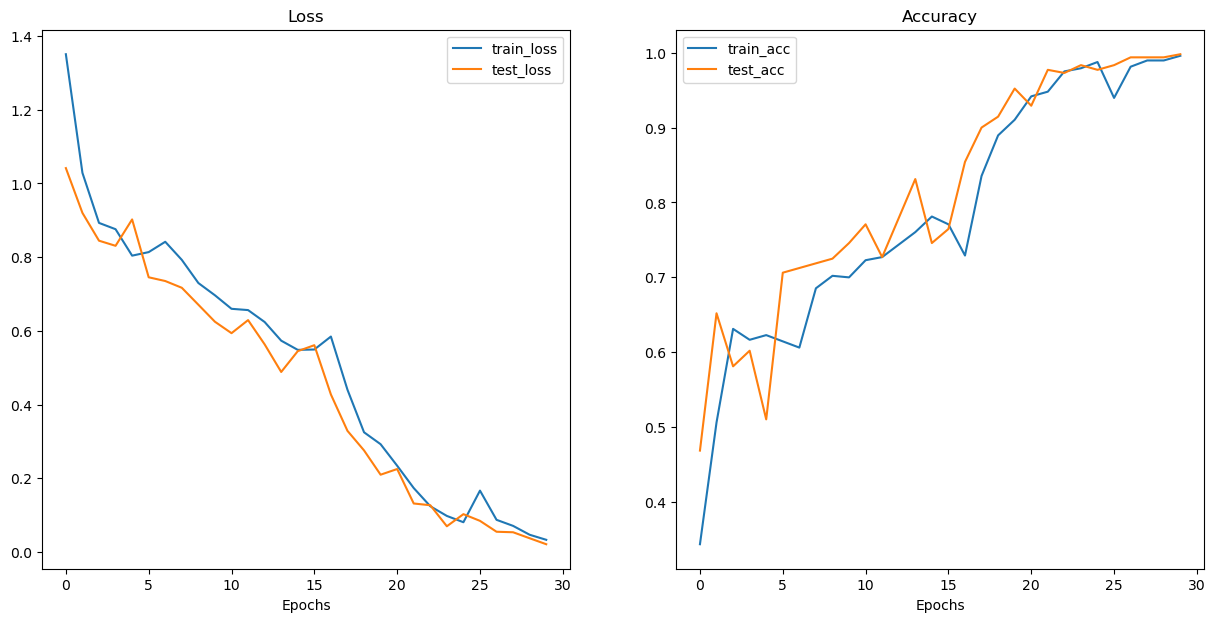

In [156]:
plot_loss_curves(train_result)

## 8. Make a prediction on your own custom image of pizza/steak/sushi (you could even download one from the internet) with your trained model from exercise 7 and share your prediction. 
* Does the model you trained in exercise 7 get it right? 
* If not, what do you think you could do to improve it?

In [168]:
import torchvision

custom_image_path = data_path / "custom-image-sushi.jpeg"
custom_image = torchvision.io.read_image(custom_image_path).type(torch.float32)
print(custom_image.size()[0])
custom_image = custom_image[:3]
custom_image = custom_image / 255
custom_image.shape

4


torch.Size([3, 998, 944])

(np.float64(-0.5), np.float64(943.5), np.float64(997.5), np.float64(-0.5))

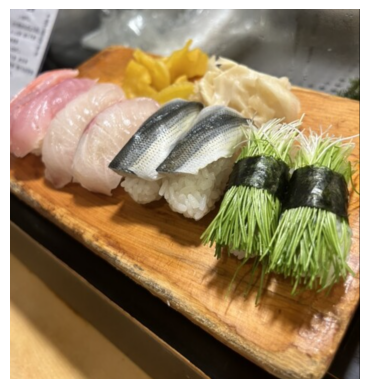

In [158]:
plt.imshow(custom_image.permute(1, 2, 0))
plt.axis(False)

In [159]:
simple_transform = transforms.Compose([
    transforms.Resize(size=(64, 64))
])
custom_image_transformed = simple_transform(custom_image)
custom_image_transformed.shape

torch.Size([3, 64, 64])

torch.Size([1, 3, 64, 64])

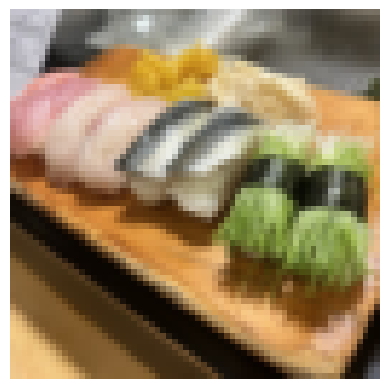

In [160]:
plt.imshow(custom_image_transformed.permute(1, 2, 0))
plt.axis(False)

custom_image_transformed.unsqueeze(dim=0).shape

In [161]:
model_custom.eval()
with torch.inference_mode():
    y_pred = model_custom(custom_image_transformed.unsqueeze(dim=0).to(device=device))
    y_label = torch.softmax(y_pred, dim=1).argmax(dim=1)

class_names[y_label]

'sushi'